<a href="https://colab.research.google.com/github/asad181105/Automatic-Number-Plate-Detection-using-OpenCV-/blob/main/Copy_of_Automatic_Number_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The computer vision project uses machine learning, radar technology,and OCR to analyze Egyptian license plates🚘. EasyOCR library is employed for Arabic OCR. The code processes images, detects plate edges, and uses OCR for text. The results are displayed visually, demonstrating the integration of computer vision and OCR for license plate analysis. 🚘🚘

## 1 - Import librarys necessary to done the project

In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
import cv2
import os
import easyocr
from easyocr import Reader
import matplotlib.pylab as plt

## 2 - Reading the data set file


In [ ]:
image_folder = "/content/sample_data/data"

### 3 - This line prepares an OCR reader in the Arabic programming language using a central processing unit (CPU) and without printing details of internal operations.

In [ ]:
reader = Reader(['ar'], gpu=False, verbose=False)

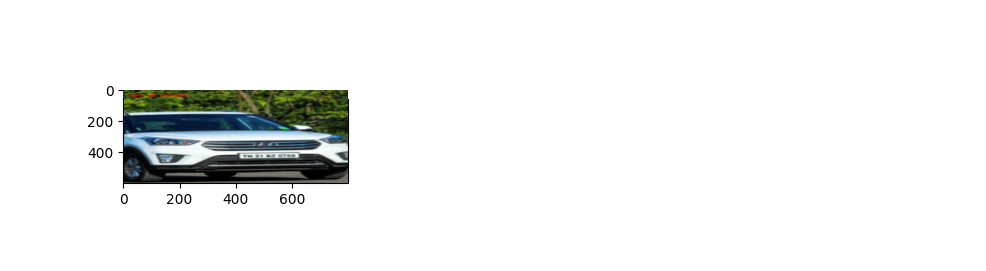

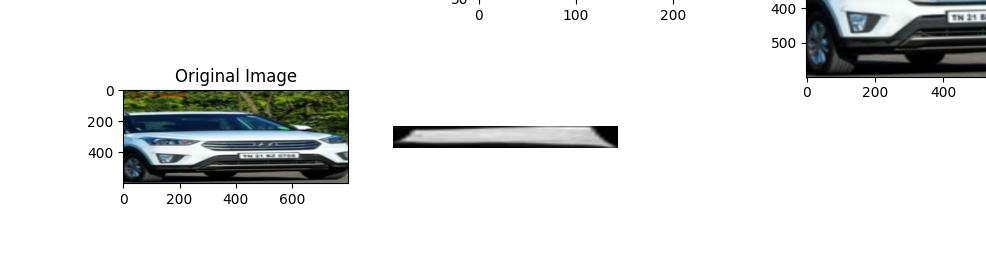

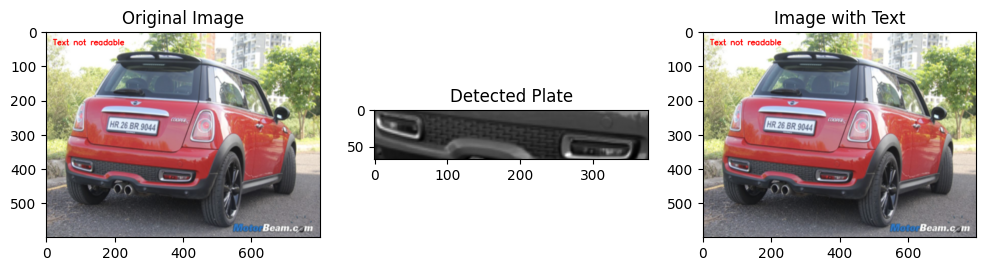

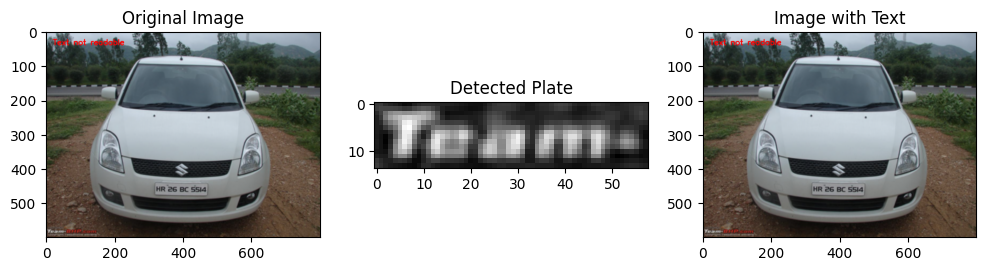

car-wbs-KA03MG2784_00000.png: 2704 (54.06%)


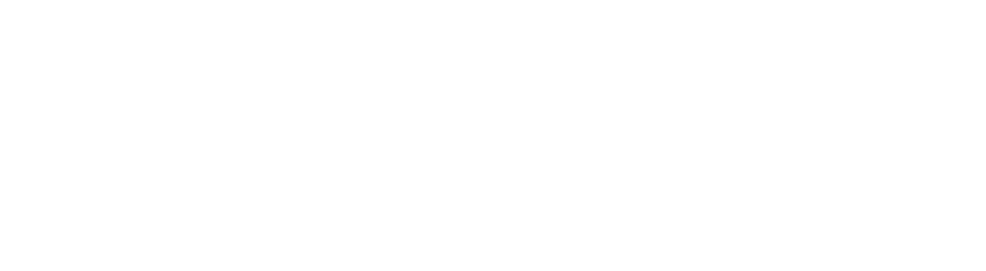

car-wbs-KA05MG1909_00000.png:  ٥ (62.23%)


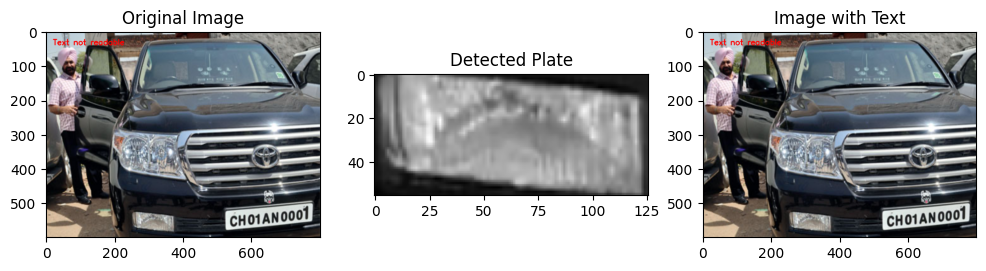

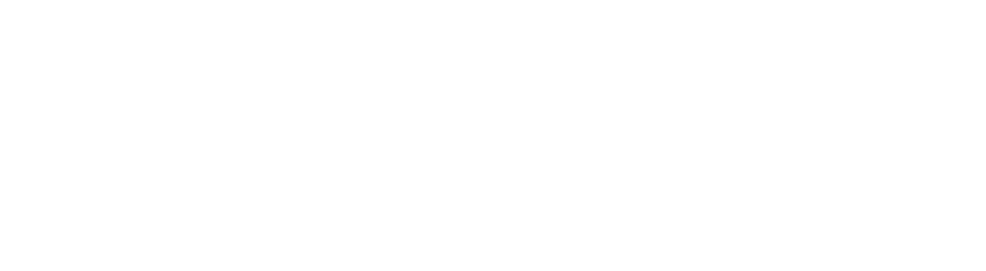

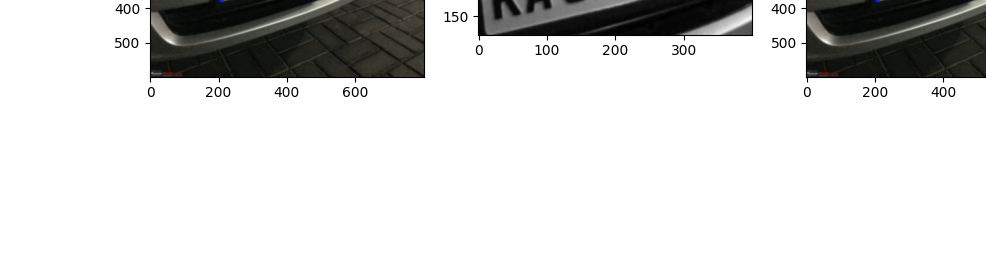

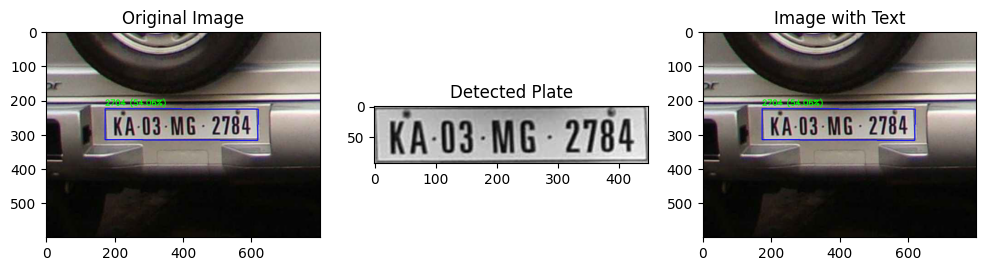

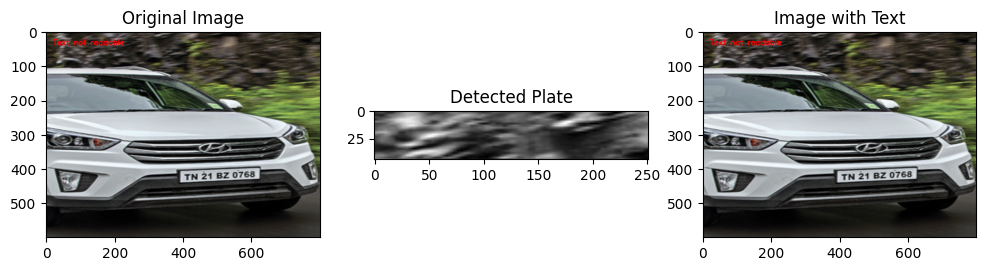

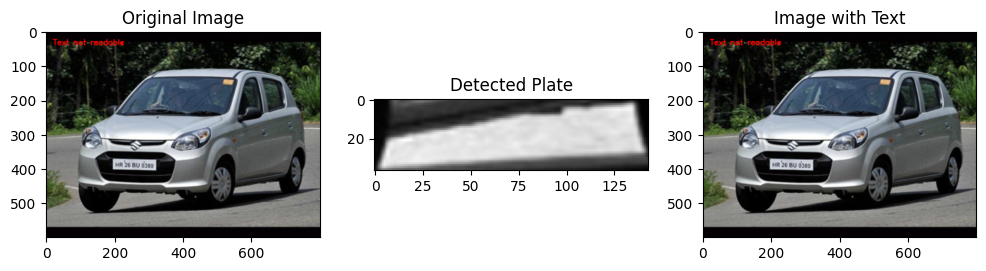

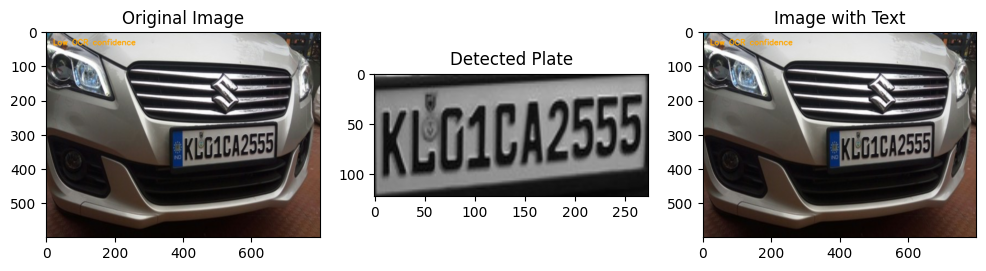

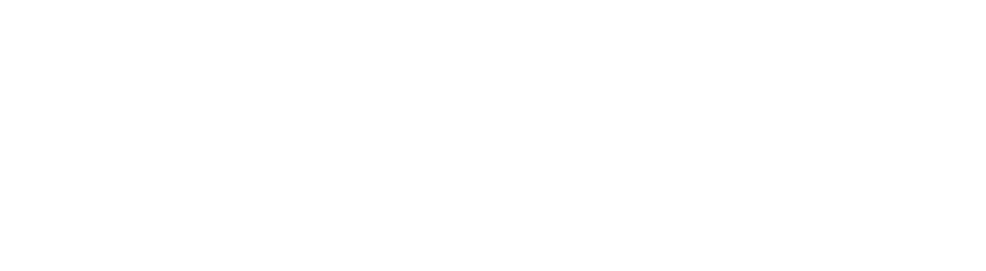

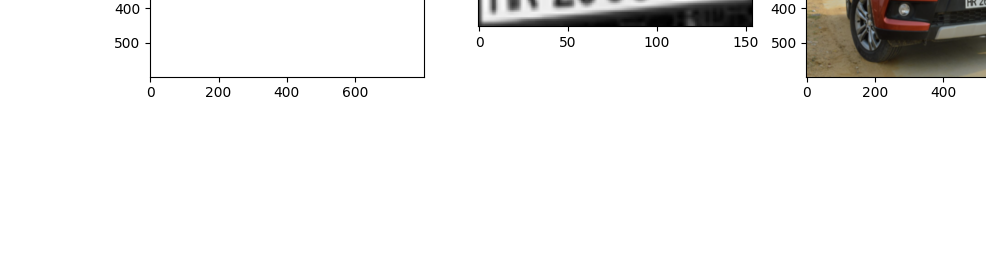

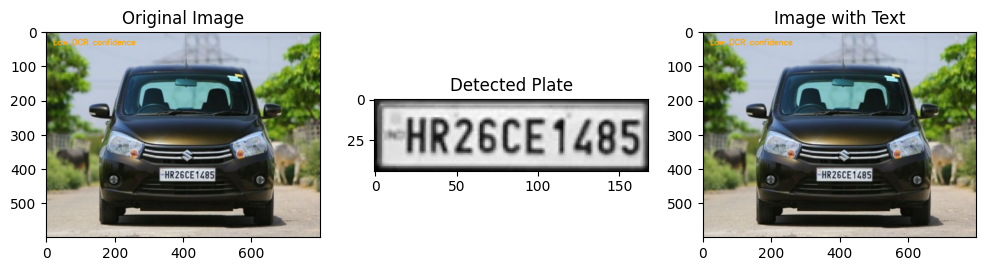

car-wbs-TN21BY0166_00000.png: ٥٥٥٤ (80.66%)


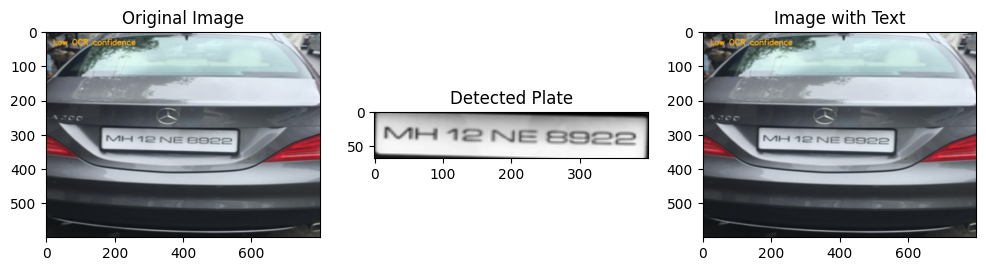

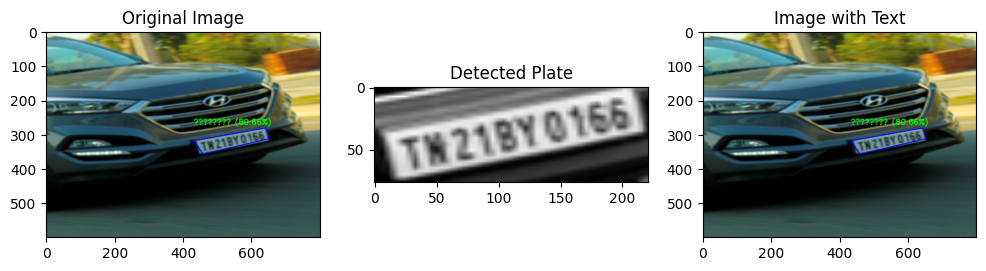

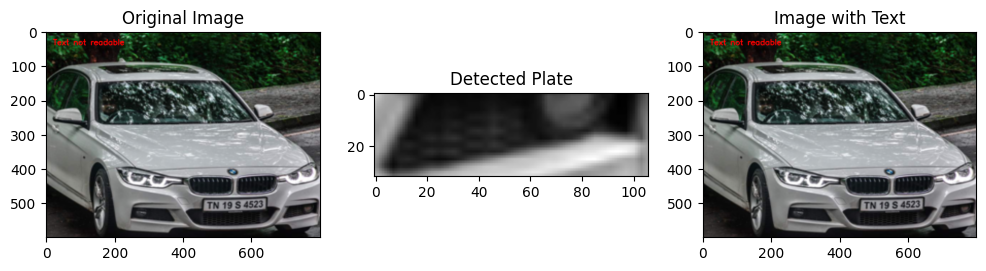

car-wbs-DL7CN5617_00000.png: ٥٧7٥ » 5617 (59.75%)


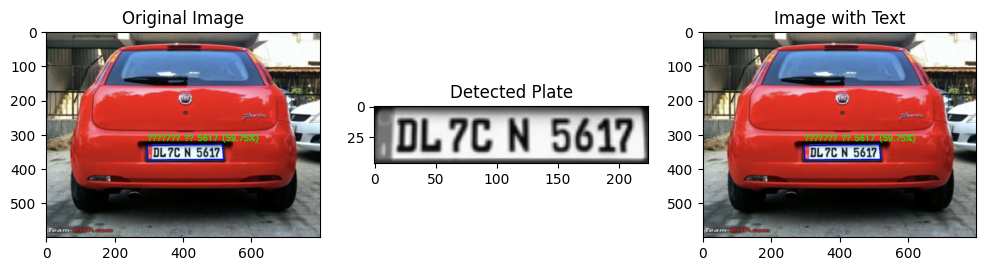

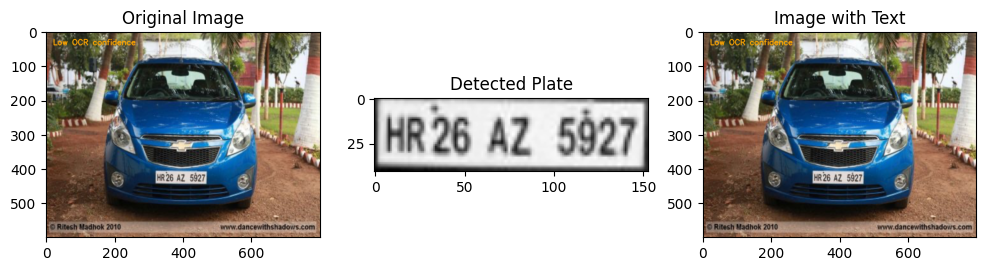

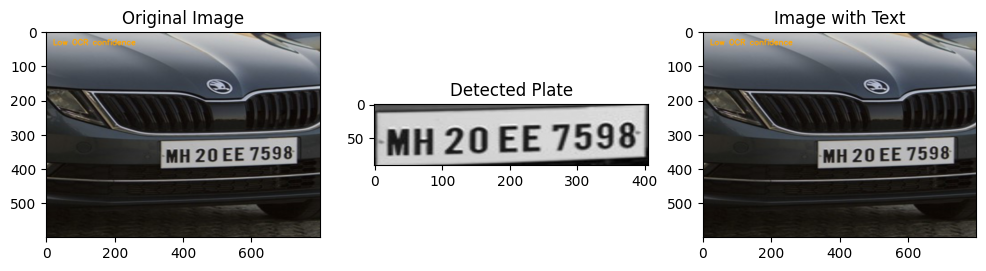

In [ ]:
import cv2
import os
import easyocr
from easyocr import Reader
import matplotlib.pylab as plt
# Import ThreadPoolExecutor
from concurrent.futures import ThreadPoolExecutor

image_folder = "/content/sample_data/data"

reader = Reader(['ar'], gpu=False, verbose=False)


def process_image(filename):
    if not filename.endswith(".png"):
        return

    image_path = os.path.join(image_folder, filename)
    car = cv2.imread(image_path)
    if car is None:
        print(f"Unable to read {filename}")
        return

    car = cv2.resize(car, (800, 600))
    gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blur, 50, 200)

    # Improve detection using morphological ops
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    edged = cv2.dilate(edged, kernel, iterations=1)

    cont, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = sorted(cont, key=cv2.contourArea, reverse=True)[:10]

    plate_cnt = None
    for c in cont:
        arc = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * arc, True)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = w / float(h)
            if 2 <= aspect_ratio <= 6:  # typical license plate AR
                plate_cnt = approx
                break

    if plate_cnt is not None:
        (x, y, w, h) = cv2.boundingRect(plate_cnt)
        x, y = max(0, x), max(0, y)
        plate_roi = gray[y:y + h, x:x + w]

        detection = reader.readtext(plate_roi)

        if not detection:
            text = "Text not readable"
            cv2.putText(car, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
        else:
            best = max(detection, key=lambda x: x[2])  # best confidence
            if best[2] > 0.5:
                cv2.drawContours(car, [plate_cnt], -1, (255, 0, 0), 2)
                text = f"{best[1]} ({best[2] * 100:.2f}%)"
                cv2.putText(car, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
                print(f"{filename}: {text}")
            else:
                text = "Low OCR confidence"
                cv2.putText(car, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 165, 255), 2)

        # Display images
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(car, cv2.COLOR_BGR2RGB))s
        plt.title("Original Image")

        plt.subplot(1, 3, 2)
        plt.imshow(plate_roi, cmap='gray')
        plt.title("Detected Plate")

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(car, cv2.COLOR_BGR2RGB))
        plt.title("Image with Text")
        plt.show()

# Parallelize for speed
with ThreadPoolExecutor(max_workers=4) as executor:
    executor.map(process_image, os.listdir(image_folder))